In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf

In [2]:
data = pd.read_csv('data/barometer.csv', index_col='date', parse_dates=True)
data.tail(5)

,spy_o,spy_h,spy_l,spy_c,barometer_o,barometer_h,barometer_l,barometer_c,barometer,barometer_no_leakage_o,barometer_no_leakage_h,barometer_no_leakage_l,barometer_no_leakage_c,barometer_no_leakage
date,,,,,,,,,,,,,,
2022-01-24,432.029999,440.109985,420.760010,439.390015,0.267559,0.023098,0.170457,0.060325,0.130360,0.266933,0.023109,0.169803,0.060007,0.129963
2022-01-25,433.059998,439.720001,427.160004,434.390015,0.064115,0.036666,0.091205,0.072278,0.066066,0.063847,0.036638,0.090742,0.071906,0.065783
2022-01-26,440.720001,444.040009,428.859985,434.299988,0.076785,0.045367,0.107777,0.056468,0.071599,0.076571,0.045265,0.107451,0.056351,0.071409
2022-01-27,438.260010,441.589996,429.450012,431.239990,0.085486,0.050861,0.090173,0.089971,0.079123,0.085450,0.050857,0.090093,0.089936,0.079084
2022-01-28,432.679993,442.000000,427.820007,441.950012,0.098314,0.074969,0.203871,0.178889,0.139010,0.098314,0.074969,0.203871,0.178889,0.139010


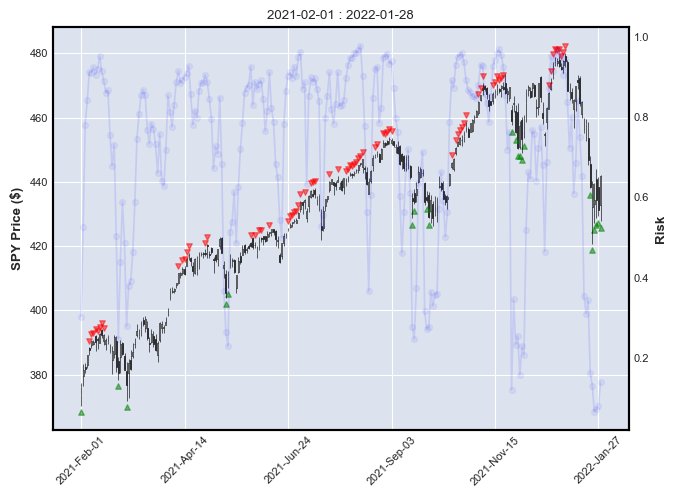

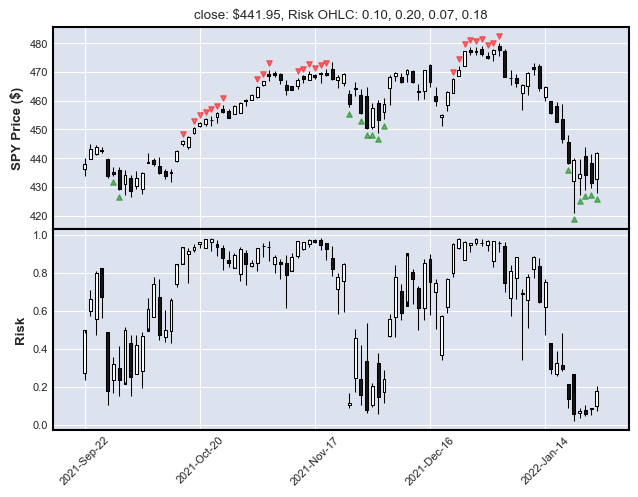

In [5]:
df = data.iloc[-252:].copy()

signal = df.barometer.map(lambda x: x < 0.3)
indx_list = signal[signal == True].index
df_signal_up = pd.DataFrame()
df_signal_up.index = signal.index
df_signal_up['value'] = np.NaN
for indx in indx_list:  
    df_signal_up.loc[indx] = df.loc[indx]['spy_l'] * 0.995

signal = df.barometer.map(lambda x: x > 0.87)
indx_list = signal[signal == True].index
df_signal_down = pd.DataFrame()
df_signal_down.index = signal.index
df_signal_down['value'] = np.NaN
for indx in indx_list:  
    df_signal_down.loc[indx] = df.loc[indx]['spy_h'] * 1.005

apds = [
    mpf.make_addplot(df_signal_up,type='scatter',markersize=15,color = 'green',alpha = 0.5, marker='^'),
    mpf.make_addplot(df_signal_down,type='scatter',markersize=15,color = 'red',alpha = 0.5, marker='v'),    
    mpf.make_addplot(df.barometer_no_leakage, type='line', alpha = 0.1, color = 'blue', ylabel = 'Risk'), 
    mpf.make_addplot(df.barometer_no_leakage, type='scatter', alpha = 0.05, color = 'blue', ylabel = 'Risk'), 
    
    ]

mpf.plot(
            df.rename(columns={"spy_o": "Open", "spy_h": "High", 
                                       "spy_l": "Low", "spy_c": "Close"}),
            type='candle', 
            ylabel='SPY Price ($)',
            addplot=apds,
            figscale=1,
            style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}), 
            axtitle='{} : {}'.format(str(df.index[0])[:10], str(df.index[-1])[:10]),
         )  


days = 90
apds = [
    mpf.make_addplot(df.iloc[-days:].rename(columns={"barometer_no_leakage_o": "Open", "barometer_no_leakage_l": "High",
                                                        "barometer_no_leakage_h": "Low", "barometer_no_leakage_c": "Close"}),
                                                        type='candle', color = 'red', alpha = 0.3, width = 1.0, panel = 1, ylabel = 'Risk'), 
    mpf.make_addplot(df_signal_up.iloc[-days:],type='scatter',markersize=15,color = 'green',alpha = 0.5, marker='^'),
    mpf.make_addplot(df_signal_down.iloc[-days:],type='scatter',markersize=15,color = 'red',alpha = 0.5, marker='v'),
]



mpf.plot(
            df.iloc[-days:].rename(columns={"spy_o": "Open", "spy_h": "High", 
                                "spy_l": "Low", "spy_c": "Close"}),
            type='candle', 
            ylabel='SPY Price ($)',
            addplot=apds,
            panel_ratios=(1,1),
            figscale=1,
            style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}),    
            axtitle='close: ${:.02f}, Risk OHLC: {:.02f}, {:.02f}, {:.02f}, {:.02f}'.format( df.iloc[-1].spy_c, df.barometer_o.iloc[-1], df.barometer_l.iloc[-1], df.barometer_h.iloc[-1], df.barometer_c.iloc[-1]),
        )